# Game Trends

## Introduction
Games have been an integral part of many people's lives both growing up and present day. Games have become so big in the last few decades that it has become a massive part of the cultural landscape. In addition to its cultural impact, the gaming industry has become so big, as did the entertainment industry as a whole, that there is a lot of money involved in each game. For example, the biggest game this year "Elden Ring '' by Bandai Namco sold over 17.5 million copies in 8 months. So for my CMSC320 Final Project I wanted to explore some of the biggest games released and look at different data to see if there is some interesting information.


So first off, the chart was obtained on kaggle "Discovering Hidden Trends in Global Video Games" by Andy Bramwell. From this dataset, we are given a bit of information, but the data I was mainly interested in was when the game was published, who published the games, the sales of each game, and the reviews given. Since it was just a dataset, I was able to easily import the dataset and was able to use pandas to read the dataset. After looking at the columns available to me, I decided to create a new column averaging the sales and use that column for my analysis instead of trying to analyze the data with all four sales individually. Because I did this, I did not have to worry about null values since the mean function filters out the cell with null values.


In [365]:
import re
import time
import pandas as pd
import urllib.parse as urllib
import statsmodels.api as smf
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import math
import plotly.io as pio

In [366]:
pio.renderers.default='notebook'
table = pd.read_csv("Video Games Sales.csv")
avg = table.iloc[:,7:11].mean(axis=1)
table["Sale_Average"] = avg
table.head()

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review,Sale_Average
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28,20.2825
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00,10.0600
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07,8.3900
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65,7.8800
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00,7.5650


I wanted to do some more data cleaning before doing anything because I am planning on working with the Year. I wanted to see how many null values there are and if there were only a few I was planning on manually adding the dates, however, because there were too many, I decided to delete those rows of the missing data. 


In [367]:
print(table['Year'].isnull().values.any())
for i in range(len(table)):
    if math.isnan(table.iloc[i,4]):
        print(table.iloc[i][2])
table = table[table['Year'].notna()]

True
Madden NFL 2004
RollerCoaster Tycoon
FIFA Soccer 2004
wwe Smackdown vs. Raw 2006
LEGO Batman: The Videogame
Rock Band
Frogger's Adventures: Temple of the Frog
LEGO Indiana Jones: The Original Adventures
Call of Duty 3
Rock Band
Gran Turismo Concept 2001 Tokyo
Rock Band
Triple Play 99
Call of Duty: Black Ops
NASCAR Thunder 2003
Hitman 2: Silent Assassin
Dragon Warrior VII
LEGO Batman: The Videogame
Rock Band
Legacy of Kain: Soul Reaver
Donkey Kong Land III
Suikoden III
Wheel of Fortune
Teenage Mutant Ninja Turtles
Namco Museum
LEGO Harry Potter: Years 5-7
Blitz: The League
Yakuza 4
Madden NFL 07


Finally after cleaning up the data and having all my columns, I am able to start off visually some of the data. I wanted to start off with a bar graph to see how many games each of these publishers released. But since there are so many publishers, if we were to list everything off the bar graph would be unreadable. So I decided to only use the top 10 publishers. This can be accomplished by using a set to get all individual publishers then creating a dictionary to store all the names and occurrences. But due to the fact you cannot change the length of a dictionary while looping, I used a list to store all the occurences then added to the dictionary after.


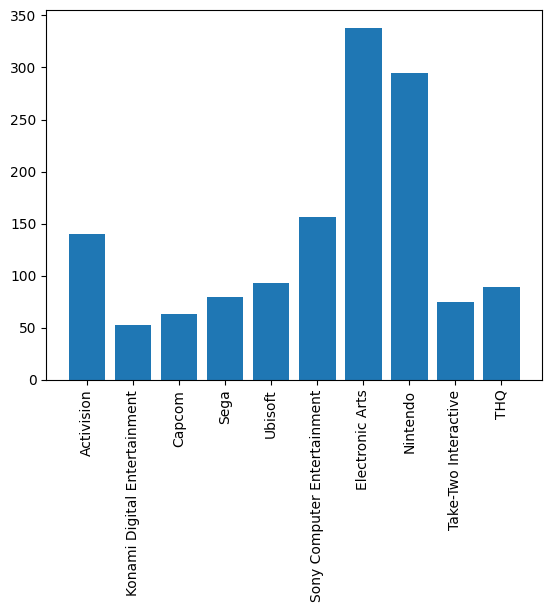

In [368]:
pio.renderers.default='notebook'
publisher = set()
for i, row1 in table.iterrows():
    publisher.add(row1["Publisher"])
res = dict.fromkeys(publisher, 0)
for i, row1 in table.iterrows():
    res[row1["Publisher"]] = res[row1["Publisher"]] + 1

top10 = []
min = 100000
for i in res.values():
    if len(top10) < 10:
        if i < min:
            min = i
        top10.append(i)
    else:
        if i > min:
            for j in range(len(top10)):
                if top10[j] == min:
                    top10[j] = i
                    min = 1000000
                    for x in range(len(top10)):
                        if top10[x] < min:
                            min = top10[x]
                    break

top_dict = {}
for i in top10:
    for j in res.keys():
        if i == res[j]:
            top_dict[j] = i
            break
names = list(top_dict.keys())
values = list(top_dict.values())
plt.bar(range(len(top_dict)), values, tick_label=names)
plt.xticks(rotation=90)
plt.show()

From the chart there is not much surprise about these results. Even though there are so many different publishers, the gaming industry is still dominated by these giant gaming companies. Just looking at this bar graph, Both EA and Nintendo are clearly the two biggest publishing companies in the gaming industry. Even with the top biggest publishers, the closest company to these two is Sony who is also a massive company but still has almost 150 games from the two giants.


But just seeing this data does not tell us very much. Games have been a big thing mostly in recent years as gaming culture was not that big in the past. When I was growing up, I remember I knew all the big games that were coming out and anything a big company released a new game was always a big deal. However, in more recent years, so many different games are being released it is becoming harder and harder to keep track of all the games coming out from these big name publishers. So In order to visualize this, I decided to split the dataframe into 5 different decades and created 5 different graphs to allow it to be easier to visualize it all.


In [369]:
table['period'] = pd.cut(x=table['Year'], bins=5, labels=['1970-1979', '1980-1989', '1990-1999', '2000-2009', '2010-2020'])

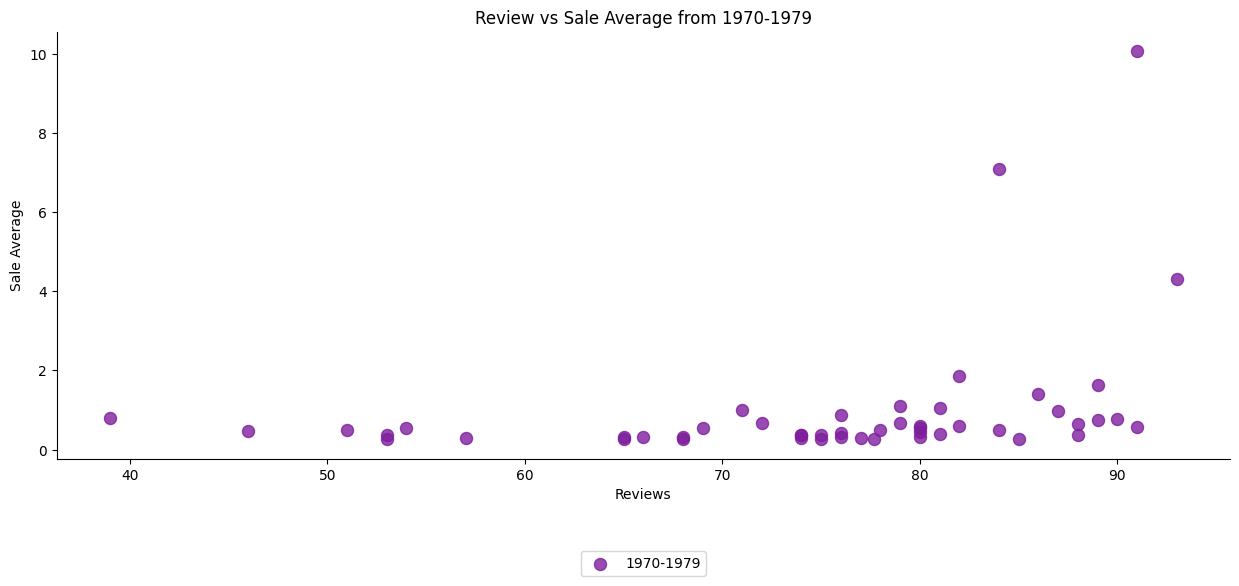

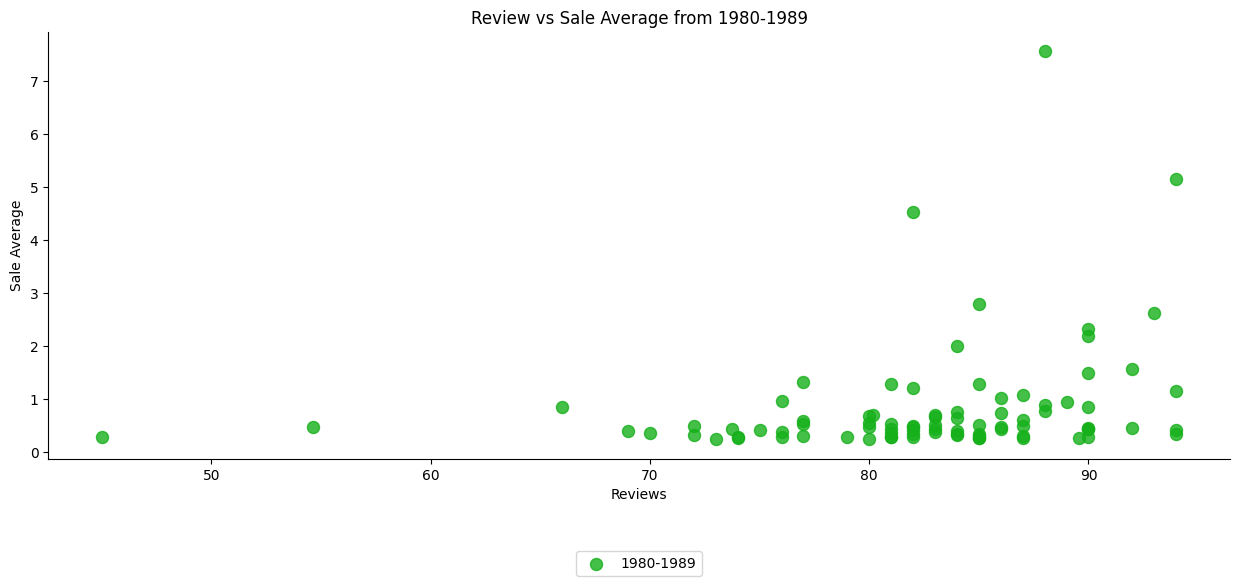

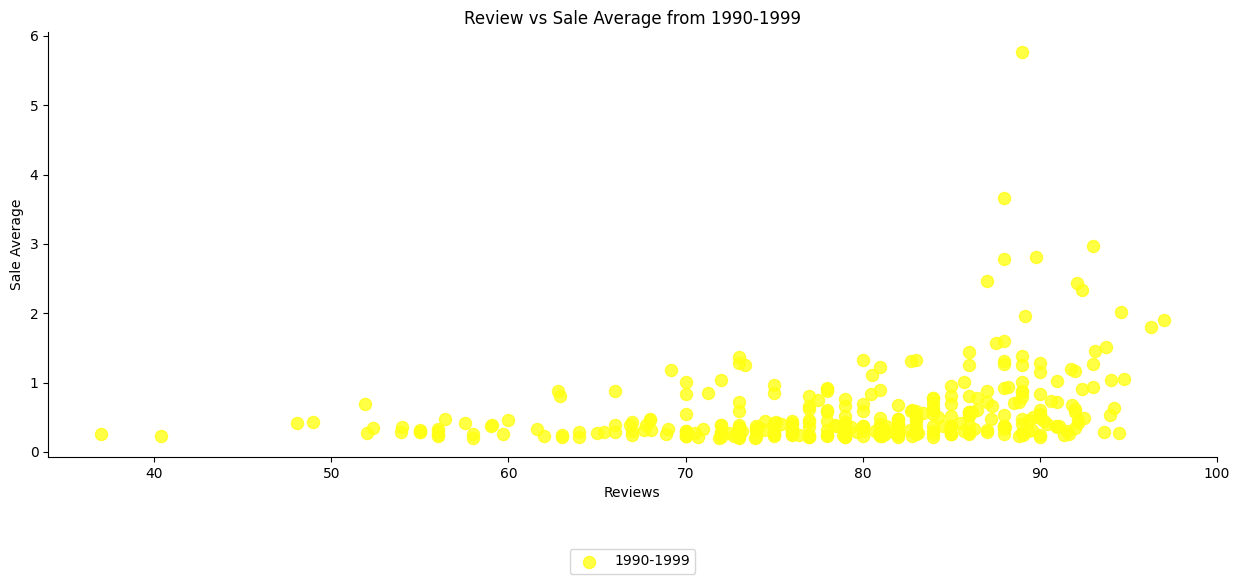

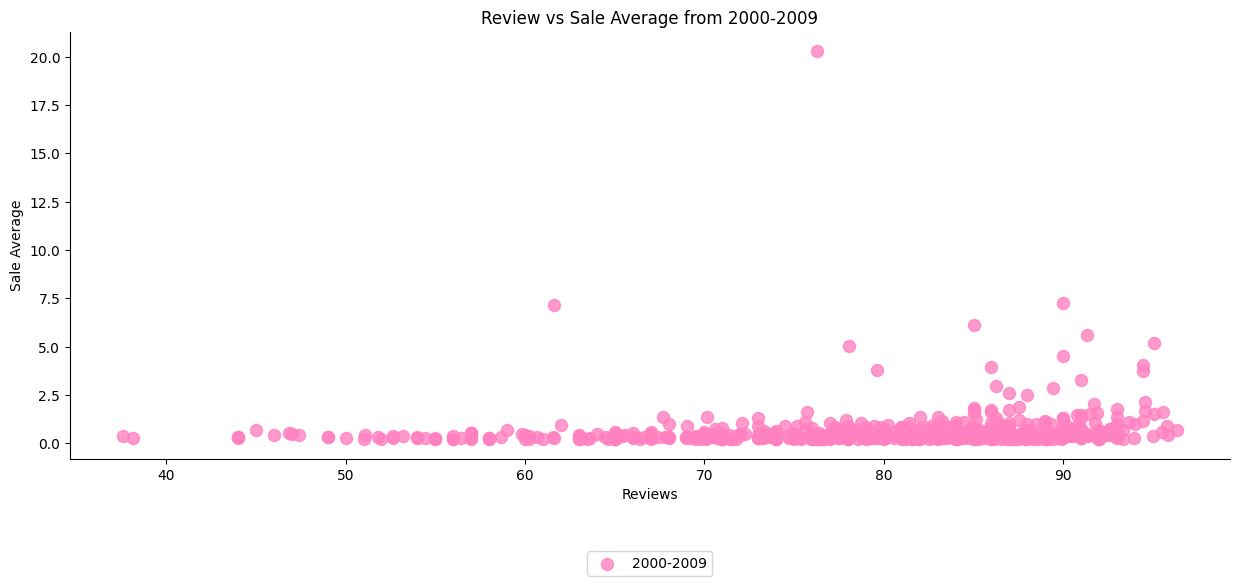

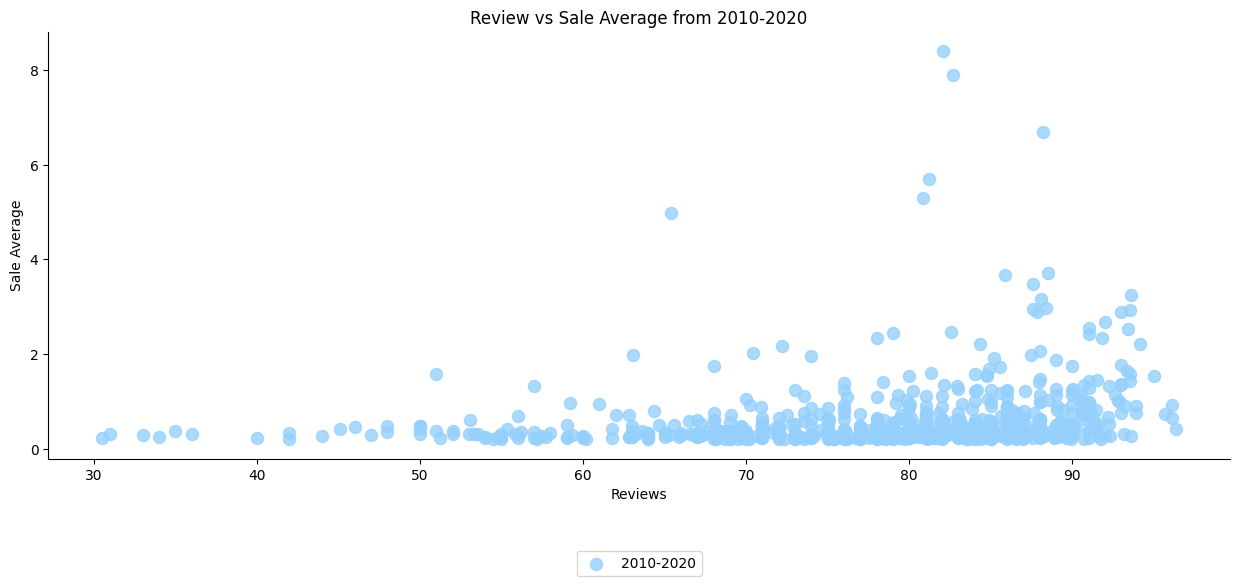

In [370]:
pio.renderers.default='notebook'
colors = ["purple", "green", "yellow", "pink", "light blue"]
period = table.groupby('period')
new_palette = sns.xkcd_palette(colors)
for date, tbl in period:
    sns.lmplot(x="Review", y="Sale_Average", data=tbl, fit_reg=False, hue='period', legend=False, palette=new_palette, aspect=2.5, scatter_kws={"s": 75})
    plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2), ncol=5)
    plt.title("Review vs Sale Average from "+date)
    plt.xlabel('Reviews')
    plt.ylabel('Sale Average')


Just as I imagined the amount of games released had a massive jump from pre 1990 compared to post 1990. It is not too shocking that there tends to be a trend where the sale average tends to go up as the review goes up. But what is interesting is that even for games with many high reviews most of the game sales are clustered together on the bottom. From what I can see, there really does not seem to be too much correlation between a high review and high sales. From the graphs, it seems like most games with high sales averages had high reviews so there is some correlation there. But there are not really many games with high sales averages. I think the reason for this is because there are many great games made, having a huge publishing backing the game up is likely also a good indication for success. So to test this theory, I decided to do the same thing but this time separate the graphs by publisher. Again since there are so many publishers, I decided to use just the top 10 since they make up so many of the games.


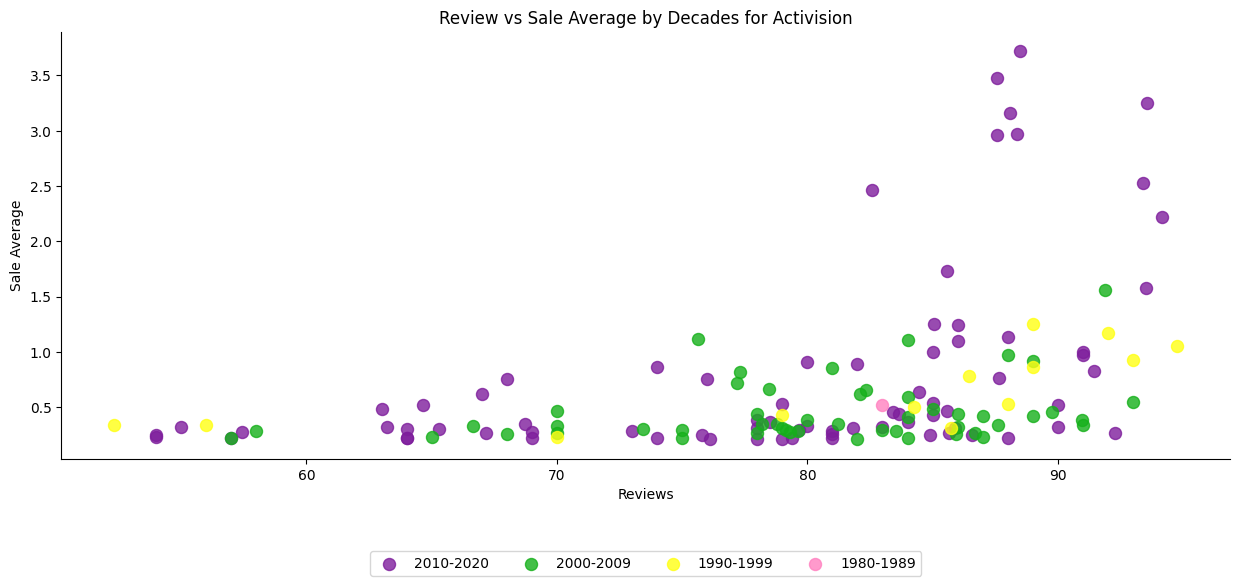

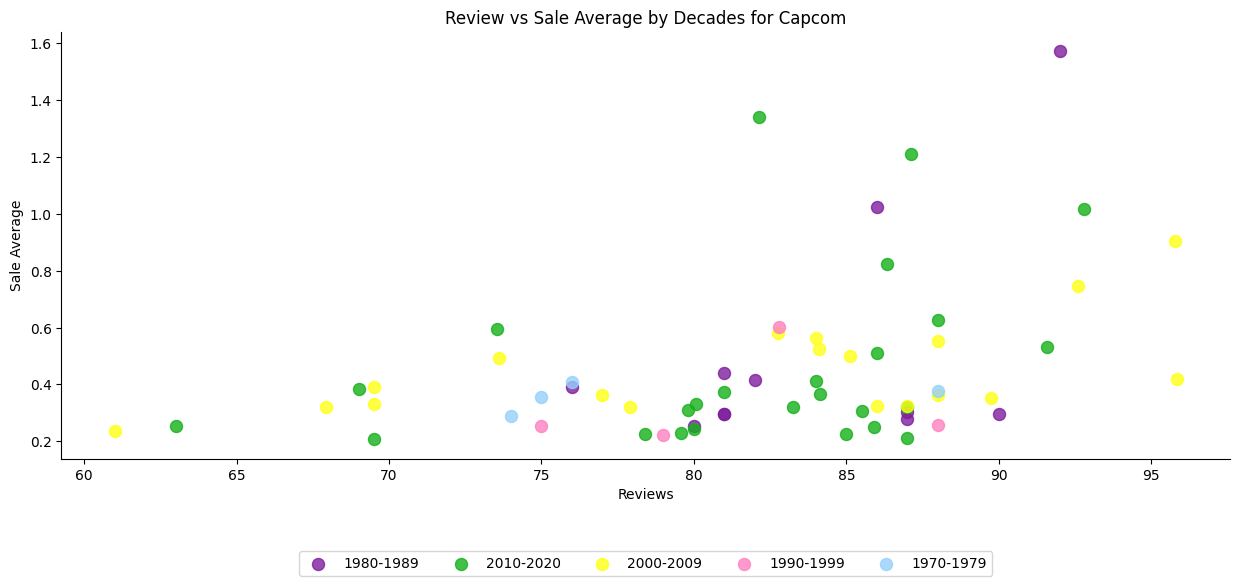

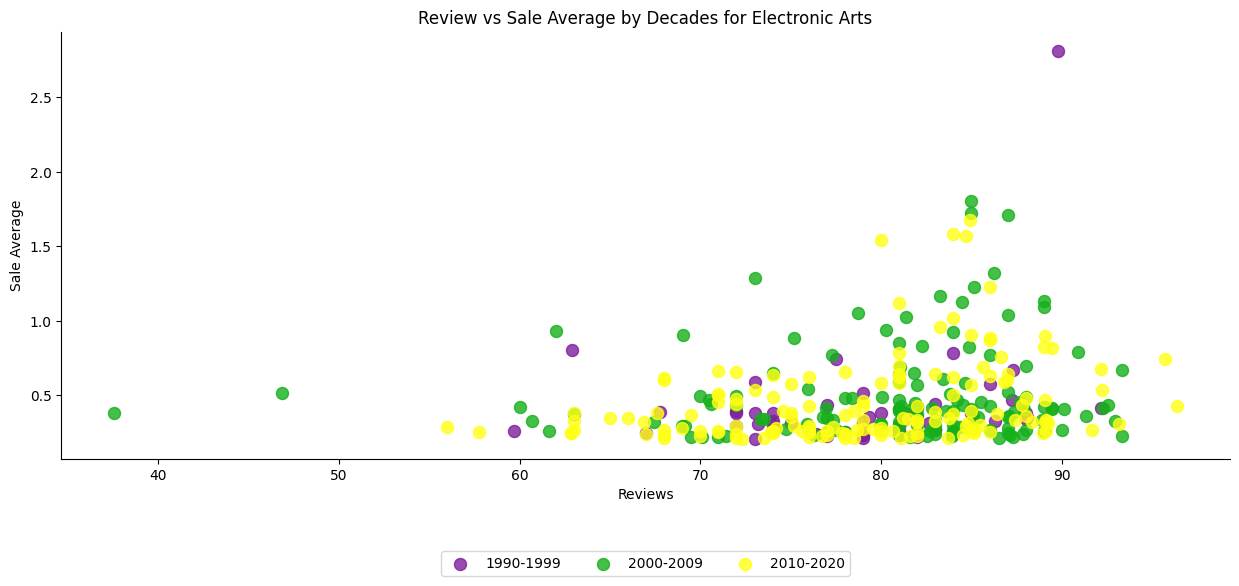

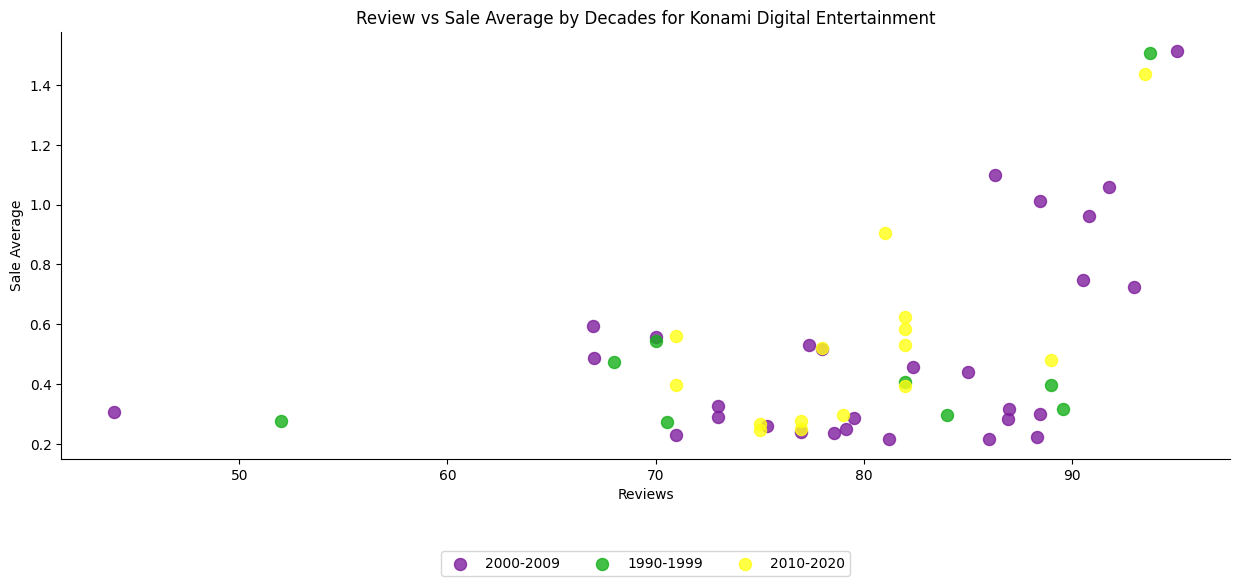

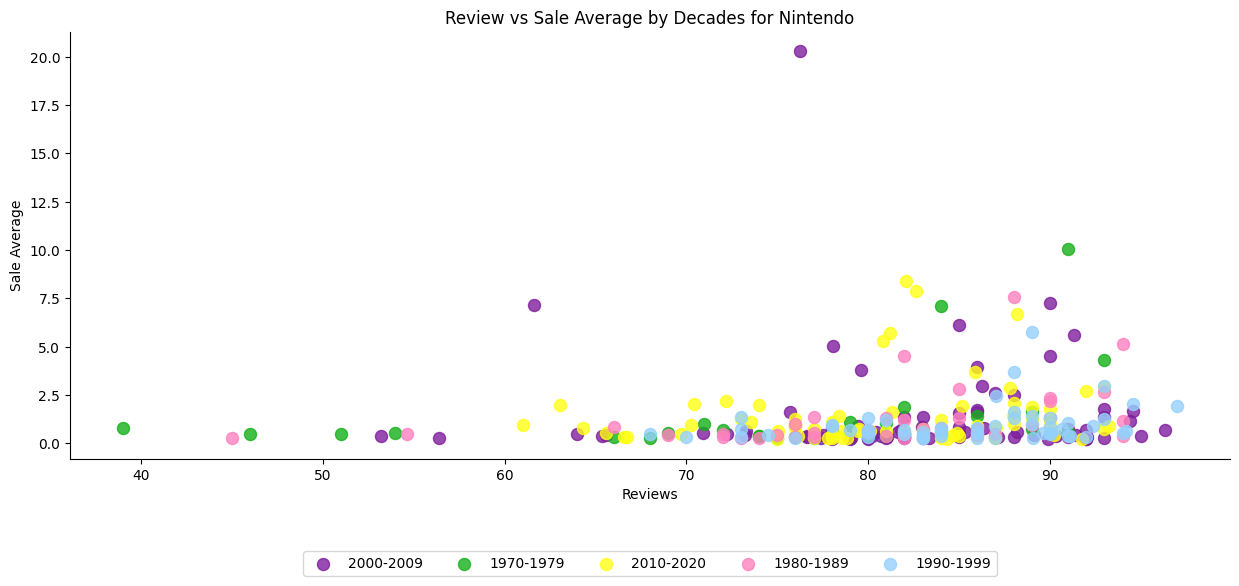

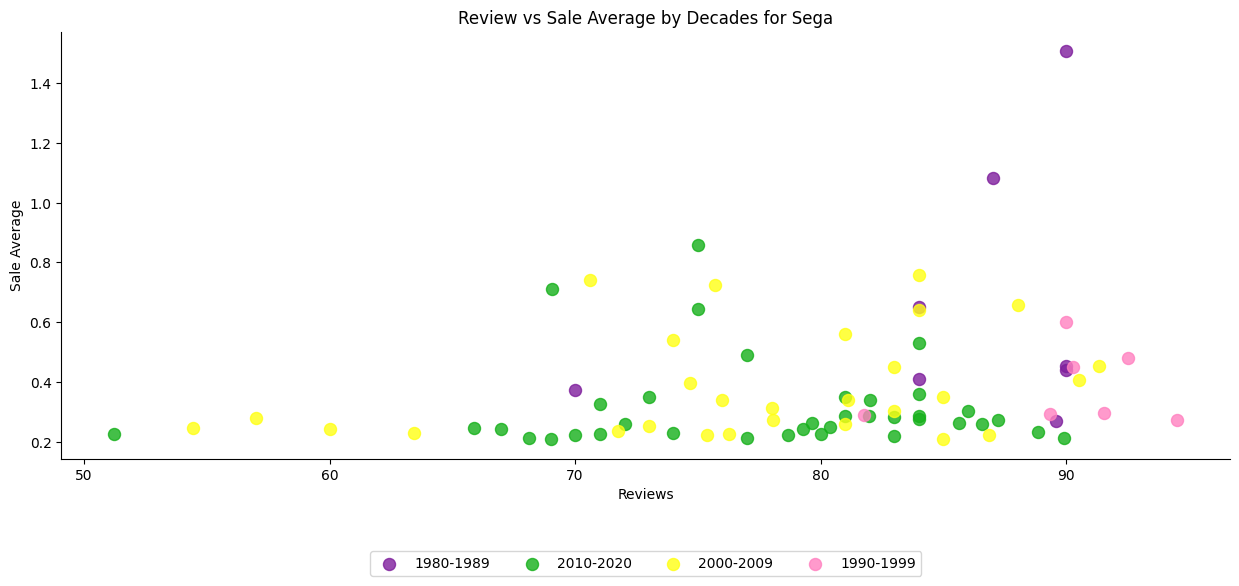

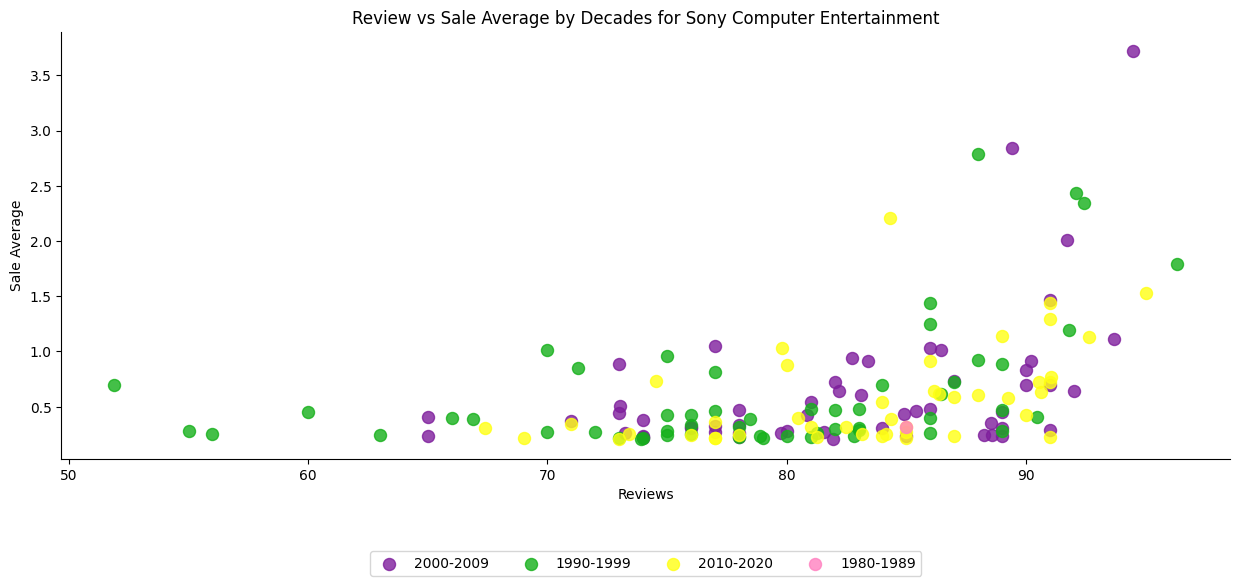

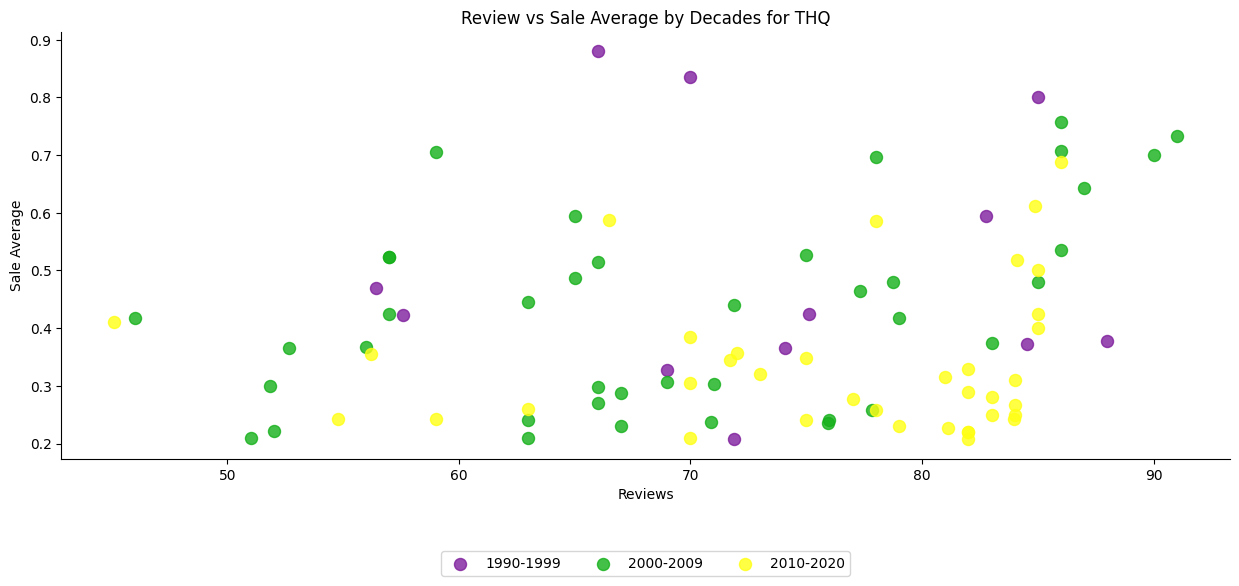

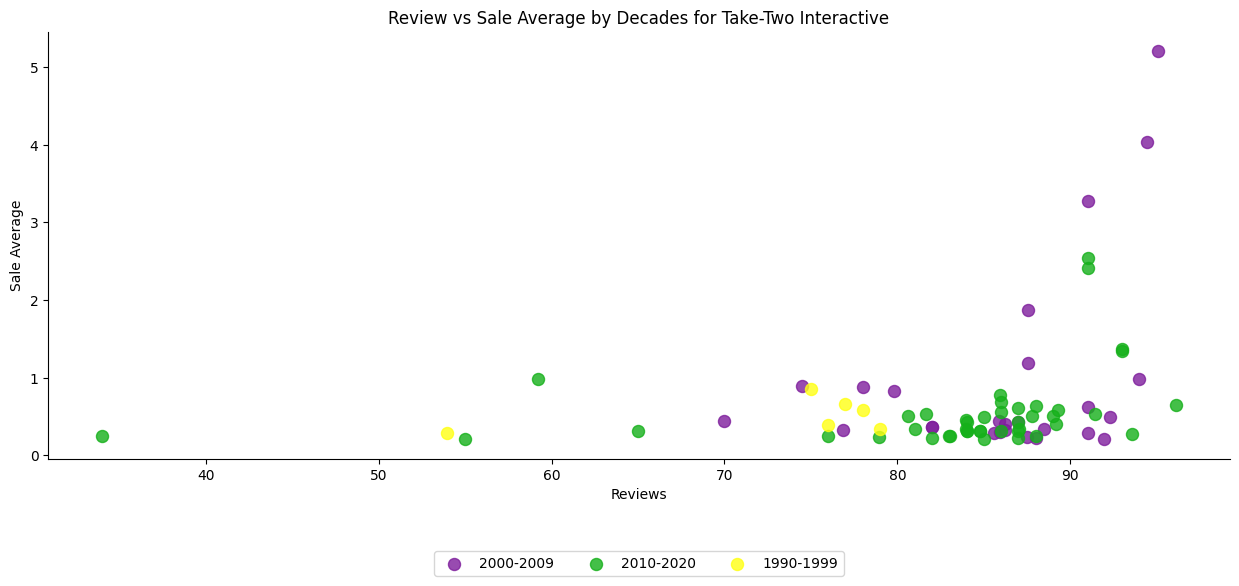

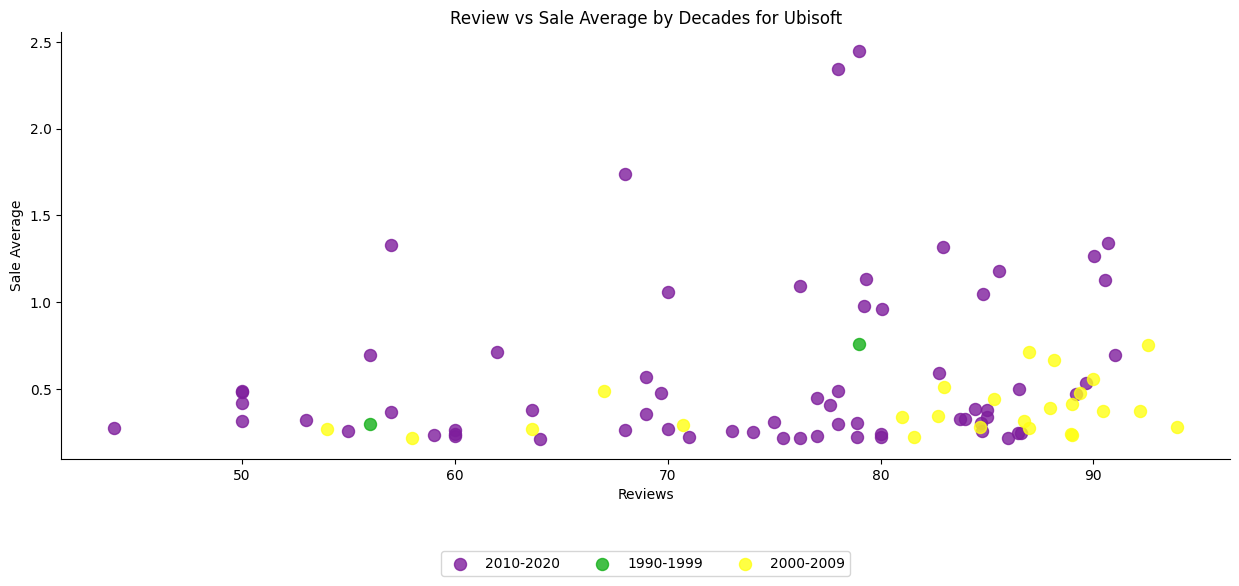

In [371]:
top10_df = pd.DataFrame()
top10_publisher = []
for i, row1 in table.iterrows():
    if row1["Publisher"] in names:
        top10_publisher.append(row1["Publisher"])
top10_df["Publisher"] = top10_publisher

top10_review = []
for i, row1 in table.iterrows():
    if row1["Publisher"] in names:
        top10_review.append(row1["Review"])
top10_df["Review"] = top10_review

top10_avg = []
for i, row1 in table.iterrows():
    if row1["Publisher"] in names:
        top10_avg.append(row1["Sale_Average"])
top10_df["Sale_Average"] = top10_avg

top10_period = []
for i, row1 in table.iterrows():
    if row1["Publisher"] in names:
        top10_period.append(row1["period"])
top10_df["period"] = top10_period


colors = ["purple", "green", "yellow", "pink", "light blue"]
pub = top10_df.groupby('Publisher')
new_palette = sns.xkcd_palette(colors)
for role, tbl in pub:
    sns.lmplot(x="Review", y="Sale_Average", data=tbl, fit_reg=False, hue='period', legend=False, palette=new_palette, aspect=2.5, scatter_kws={"s": 75})
    plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2), ncol=5)
    plt.title("Review vs Sale Average by Decades for " + role)
    plt.xlabel('Reviews')
    plt.ylabel('Sale Average')


While the graphs do not surprise me too much, there is a lot of interesting information we are seeing from these. It seems like these big publishers also have many different games that do not do too well in sales but it seems like these big publishers still seem to make up a good portion of higher sale games. Also while Electronic Arts does have the most games, their sales do not seem that high. Many of their games are all bunched up together around the 0.5 to 2 million sale range. I think the reason for this is because EA has many games but they are targeted towards a group of people. So while they do release a lot of games, its just that group of people they are targeting keep buying their games. But compared to Nintendo, they released huge games that are beloved worldwide and have a much bigger audience for them. To better visualize this, I decided to create a scatter plot but this time showing the average reviews and average sales of all games from each publisher. I created a new data frame that only contained the publisher, average review, and average sale of each publisher. After creating the dataframe, instead of using matplot like I used before to create the scatter plots, I used pandas to easily add the individual names of each publisher right next to each point on the scatter plot.


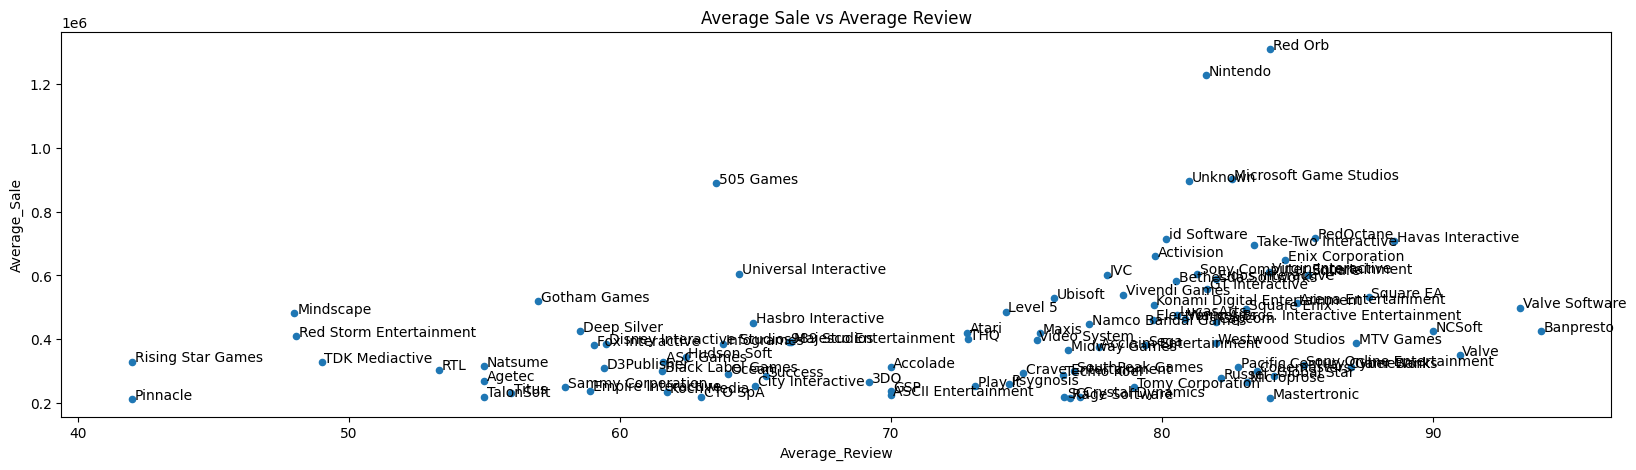

In [372]:
pio.renderers.default='notebook'
pub_avg = {}
rev_avg = {}
df = pd.DataFrame()
pub_total = dict.fromkeys(publisher, 0)
pub_review = dict.fromkeys(publisher, 0)
for i, row1 in table.iterrows():
    pub_total[row1["Publisher"]] = pub_total[row1["Publisher"]] + row1["Sale_Average"] * 1000000
for i, row1 in table.iterrows():
    pub_review[row1["Publisher"]] = pub_review[row1["Publisher"]] + row1["Review"]
pub_review
pub_list = list(publisher)
avg_list = []
rev_list = []
for i in range(len(pub_list)):
    avg_list.append(pub_total[pub_list[i]]/res[pub_list[i]])
    rev_list.append(pub_review[pub_list[i]]/res[pub_list[i]])
df["Publisher"] = pub_list
df["Average_Sale"] = avg_list
df["Average_Review"] = rev_list
plot = df.plot.scatter(x = 'Average_Review', y = 'Average_Sale', title = "Average Sale vs Average Review", figsize=(20,5))
for k in range(df.shape[0]):
    plot.text(x=df.Average_Review[k]+0.1,y=df.Average_Sale[k]+0.1,s=df.Publisher[k])

So after all that speculation from looking at these plots and graphs, I wanted to see if there was really a correlation between the reviews and average sales of a game. From the previous graphs there does not seem like there was very much correlation but I still wanted to make sure. So I decided to use a Linear regression model to test this. Since I was just testing to see if there was correlation between review and sale_average, I had to reshape the data to be able to run the linear regression test. 

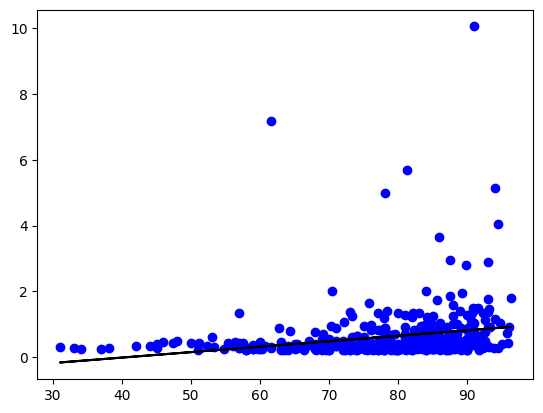

In [373]:
pio.renderers.default='notebook'
X = np.array(table['Review']).reshape(-1, 1)
y = np.array(table['Sale_Average']).reshape(-1, 1)
table.dropna(inplace = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
regr = LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')

plt.show()

Since there was clearly nothing too interesting from that linear regression test, I decided to add in another independent variable to see how things will change. As mentioned before, I believe that who is producing the game has a huge impact on the amount of sales. So I wanted to be able to add the publisher as another independent variable. But since the publishers are a bunch of different names, I gave each publisher a different number as an ID of sorts to classify them. So I again ran another linear regression test but this time I chose to use statsmodels to show us the results of the test.

In [374]:
temp = dict.fromkeys(publisher, 0)
x = 1
for i in publisher:
    temp[i] = x
    x = x + 1
    
t = []
for i, row1 in table.iterrows():
    t.append(temp[row1["Publisher"]])
table["ID"] = t

x = table[['Review','ID']]
y = table['Sale_Average']

regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

x = smf.add_constant(x)
 
model = smf.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 -0.7394625633360656
Coefficients: 
 [0.01545268 0.00243427]
                            OLS Regression Results                            
Dep. Variable:           Sale_Average   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     34.75
Date:                Fri, 16 Dec 2022   Prob (F-statistic):           1.52e-15
Time:                        03:43:45   Log-Likelihood:                -2425.5
No. Observations:                1878   AIC:                             4857.
Df Residuals:                    1875   BIC:                             4874.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

From looking at the results of the linear regression test, we got a t value of 8.089 for the review and 2.166 from the ID so there does seem to have a positive correlation from both the publisher of the game and the review of the game to the average sales of a game however, the correlation is not very big. 


## Conclusion
Games have been a huge part of life and will most likely continue to be. But as the gaming industry becomes bigger and bigger, this part of culture will only grow bigger. While projects like these just looking at a bunch of data will not change the world, there is a novelty that comes from just learning a bit more about something that has been so impactful to my life. Due to this project I was able to explore a side of gaming that would have been inaccessible without help from technology. I initially wanted to see if there was a way for me to look for a secret trend that can find me the next big game. But of course I was not able to find anything conclusive or else every big game company would have found it already. Honestly, I think this is a good thing, in order for companies to have a reason to be more creative and give us better games, there needs to be a constant strive for them to invent new stuff instead of finding some secret formula and just copying it forever (EA and Nintendo).
